## Demo 1. Detect Kiremt onset with ROMP

This demo shows examples of how to detect Kiremt onset using the ROMP tool package.  

the objective is to:
1. know the parameters in `config.in` that set the onset threshold
2. understand how these parameters affect the onset detection 

In [33]:
import momp.lib.loader as loader
get_cfg = loader.get_cfg
from pathlib import Path
from IPython.display import Image, display

<br>

#### The onset threshold parameters in ROMP include:  

 `wet_init` Rain threshold (mm) to identify the first potential wet day.

 `wet_threshold` Rainfall threshold (mm) used only if no spatial thresh_file is provided.

 `wet_spell` Minimum number of days the accumlated rainfall must stay above threshold (Wet Spell).

 `dry_spell` Maximum number of consecutive dry days allowed after onset.

 `dry_extent` Search window (days) after onset to check for dry spell. 

<br>

First, we use the ICPAC operational seasonal rainfall onset definition as an example, where the threshold on accumulated rainfall technique is used: any day with less than 1 mm/day  rainfall is considered a dry day, days with at least 1 mm/day  rainfall are considered wet days. The rainy season onset date is then defined as the first day of a wet spell if the total rainfall accumulation within 3 consecutive days exceeds 20 mm and there is no dry spell of 7 or more days within the next 21 days.  

the corresponding threshold settings in `config.in` are
```
wet_init = 1
wet_threshold = 20
wet_spell = 3
dry_spell = 7
dry_extent = 21
```

Once we set these parameters, save the config file and import the onset_time_series diagnositic API from the ROMP as

In [ ]:
# copy the deterministic demo config file to params/
cfg = get_cfg()
base_dir = cfg.base_dir
!cp {base_dir}/../demo/et/config_et_prob.in {base_dir}/params/config.in

In [34]:
# from momp.app.onset_time_series import obs_onset_analysis as ons
import momp.app.onset_time_series as ots
otsa = ots.obs_onset_analysis
cfg = get_cfg()
print("dry_extent = ", cfg.dry_extent)

Configuration validated!
dry_extent =  21


<br>

we select year 2020, location 10N, 40E as an example to see if there is an onset  




--------------------------------------------------
Processing year 2020

 WARNING - specified region is not in cartopy.io.shapereader
xxxxxxxx
onset time series figure saved to ../demo/et/figure/onset_time_series.png


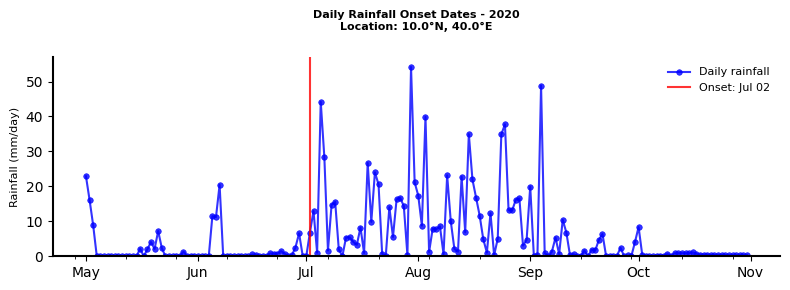

In [35]:
_ = otsa(year=2020, lat_select=10, lon_select=40, **vars(cfg))

<br>

The red line marks the onset of the rainy season, according to the onset definition.   

But we notice a few rainfall spikes in early June. Because of the dry spell constraint, that group of events are not considered as true onset.   

Now let's change the `dry_extent` to 0, which means to remove the dry spell constraint. run the diagnostic and see if an early onset is detected. 

package base dir ~/Code/benchmarking/momp
Configuration validated!
Configuration validated!
Configuration validated!
dry_extent =  0

--------------------------------------------------
Processing year 2020

 WARNING - specified region is not in cartopy.io.shapereader
xxxxxxxx
onset time series figure saved to ../demo/et/figure/onset_time_series.png


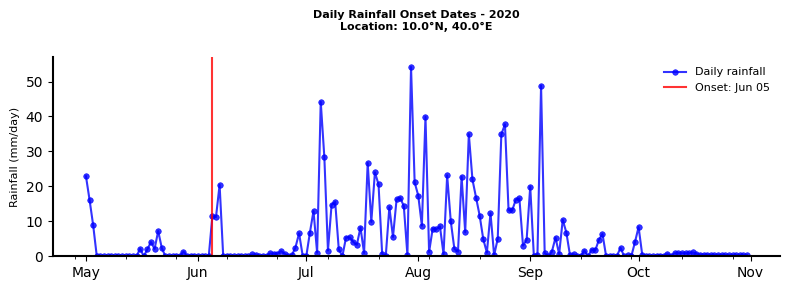

In [36]:
import importlib
importlib.reload(loader)
importlib.reload(ots)
otsa = ots.obs_onset_analysis
get_cfg = loader.get_cfg
cfg = get_cfg()
print("dry_extent = ", cfg.dry_extent)
_ = otsa(year=2020, lat_select=10, lon_select=40, **vars(cfg))

<br>

now we see the detection catch the Jun 05 as the onset date, if the following dry spell is ignored.

<br>

### Spatial variability of onset day  

A spatial map of onset day can help us objectively determine if the onset definition if sensible for the study region.  


Rather than the point based time series diagnostic, the onset map below provides a better view on the spatial variability.  



In [40]:
import momp.app.onset_spatial as osp
spatial_onset = osp.spatial_onset

Loading observational rainfall data...
xxxxxxxx
Detecting observed onset...
Detected resolution: 0.2 degrees


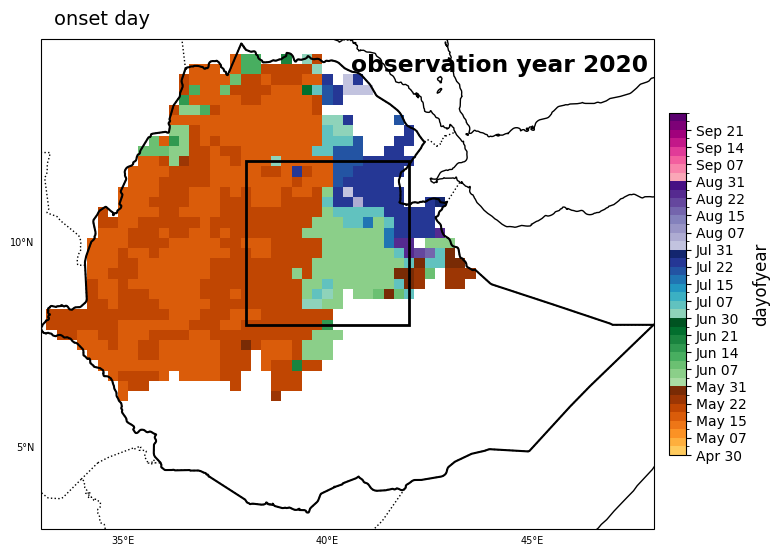

In [50]:
cfg.region = 'Ethiopia'
_ = spatial_onset(2020, **vars(cfg))

<br>

##### Prompt: 


<br>

We can also refer to the climatological onset and find out if year 2020 has any extreme onset event visually 

In [58]:
!python -m momp.graphics.onset_map --region Ethiopia

package base dir ~/Code/benchmarking/momp
Configuration validated!
Configuration validated!
processing model onset evaluation for climatology_1-15

 case.file_pattern =  {}.nc

 setting.ref_model_file_pattern =  {}.nc

 case_cfg_ref.file_pattern  =  {}.nc

  {'case_name': 'climatology_1-15', 'model': 'climatology', 'model_var': 'RAINFALL', 'model_dir': PosixPath('../data/CHIRPS_IMERG'), 'obs': 'CHIRPS_IMERG', 'obs_var': 'RAINFALL', 'ref_model': 'climatology', 'ref_model_var': 'RAINFALL', 'thresh_file': None, 'thresh_var': None, 'wet_init': 1, 'wet_threshold': 20, 'wet_spell': 3, 'dry_threshold': 1, 'dry_spell': 7, 'dry_extent': 0, 'probabilistic': False, 'members': None, 'onset_percentage_threshold': 0.5, 'verification_window': (1, 15), 'tolerance_days': 3, 'max_forecast_day': 15, 'day_bins': ((1, 5), (6, 10), (11, 15)), 'years': (1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2

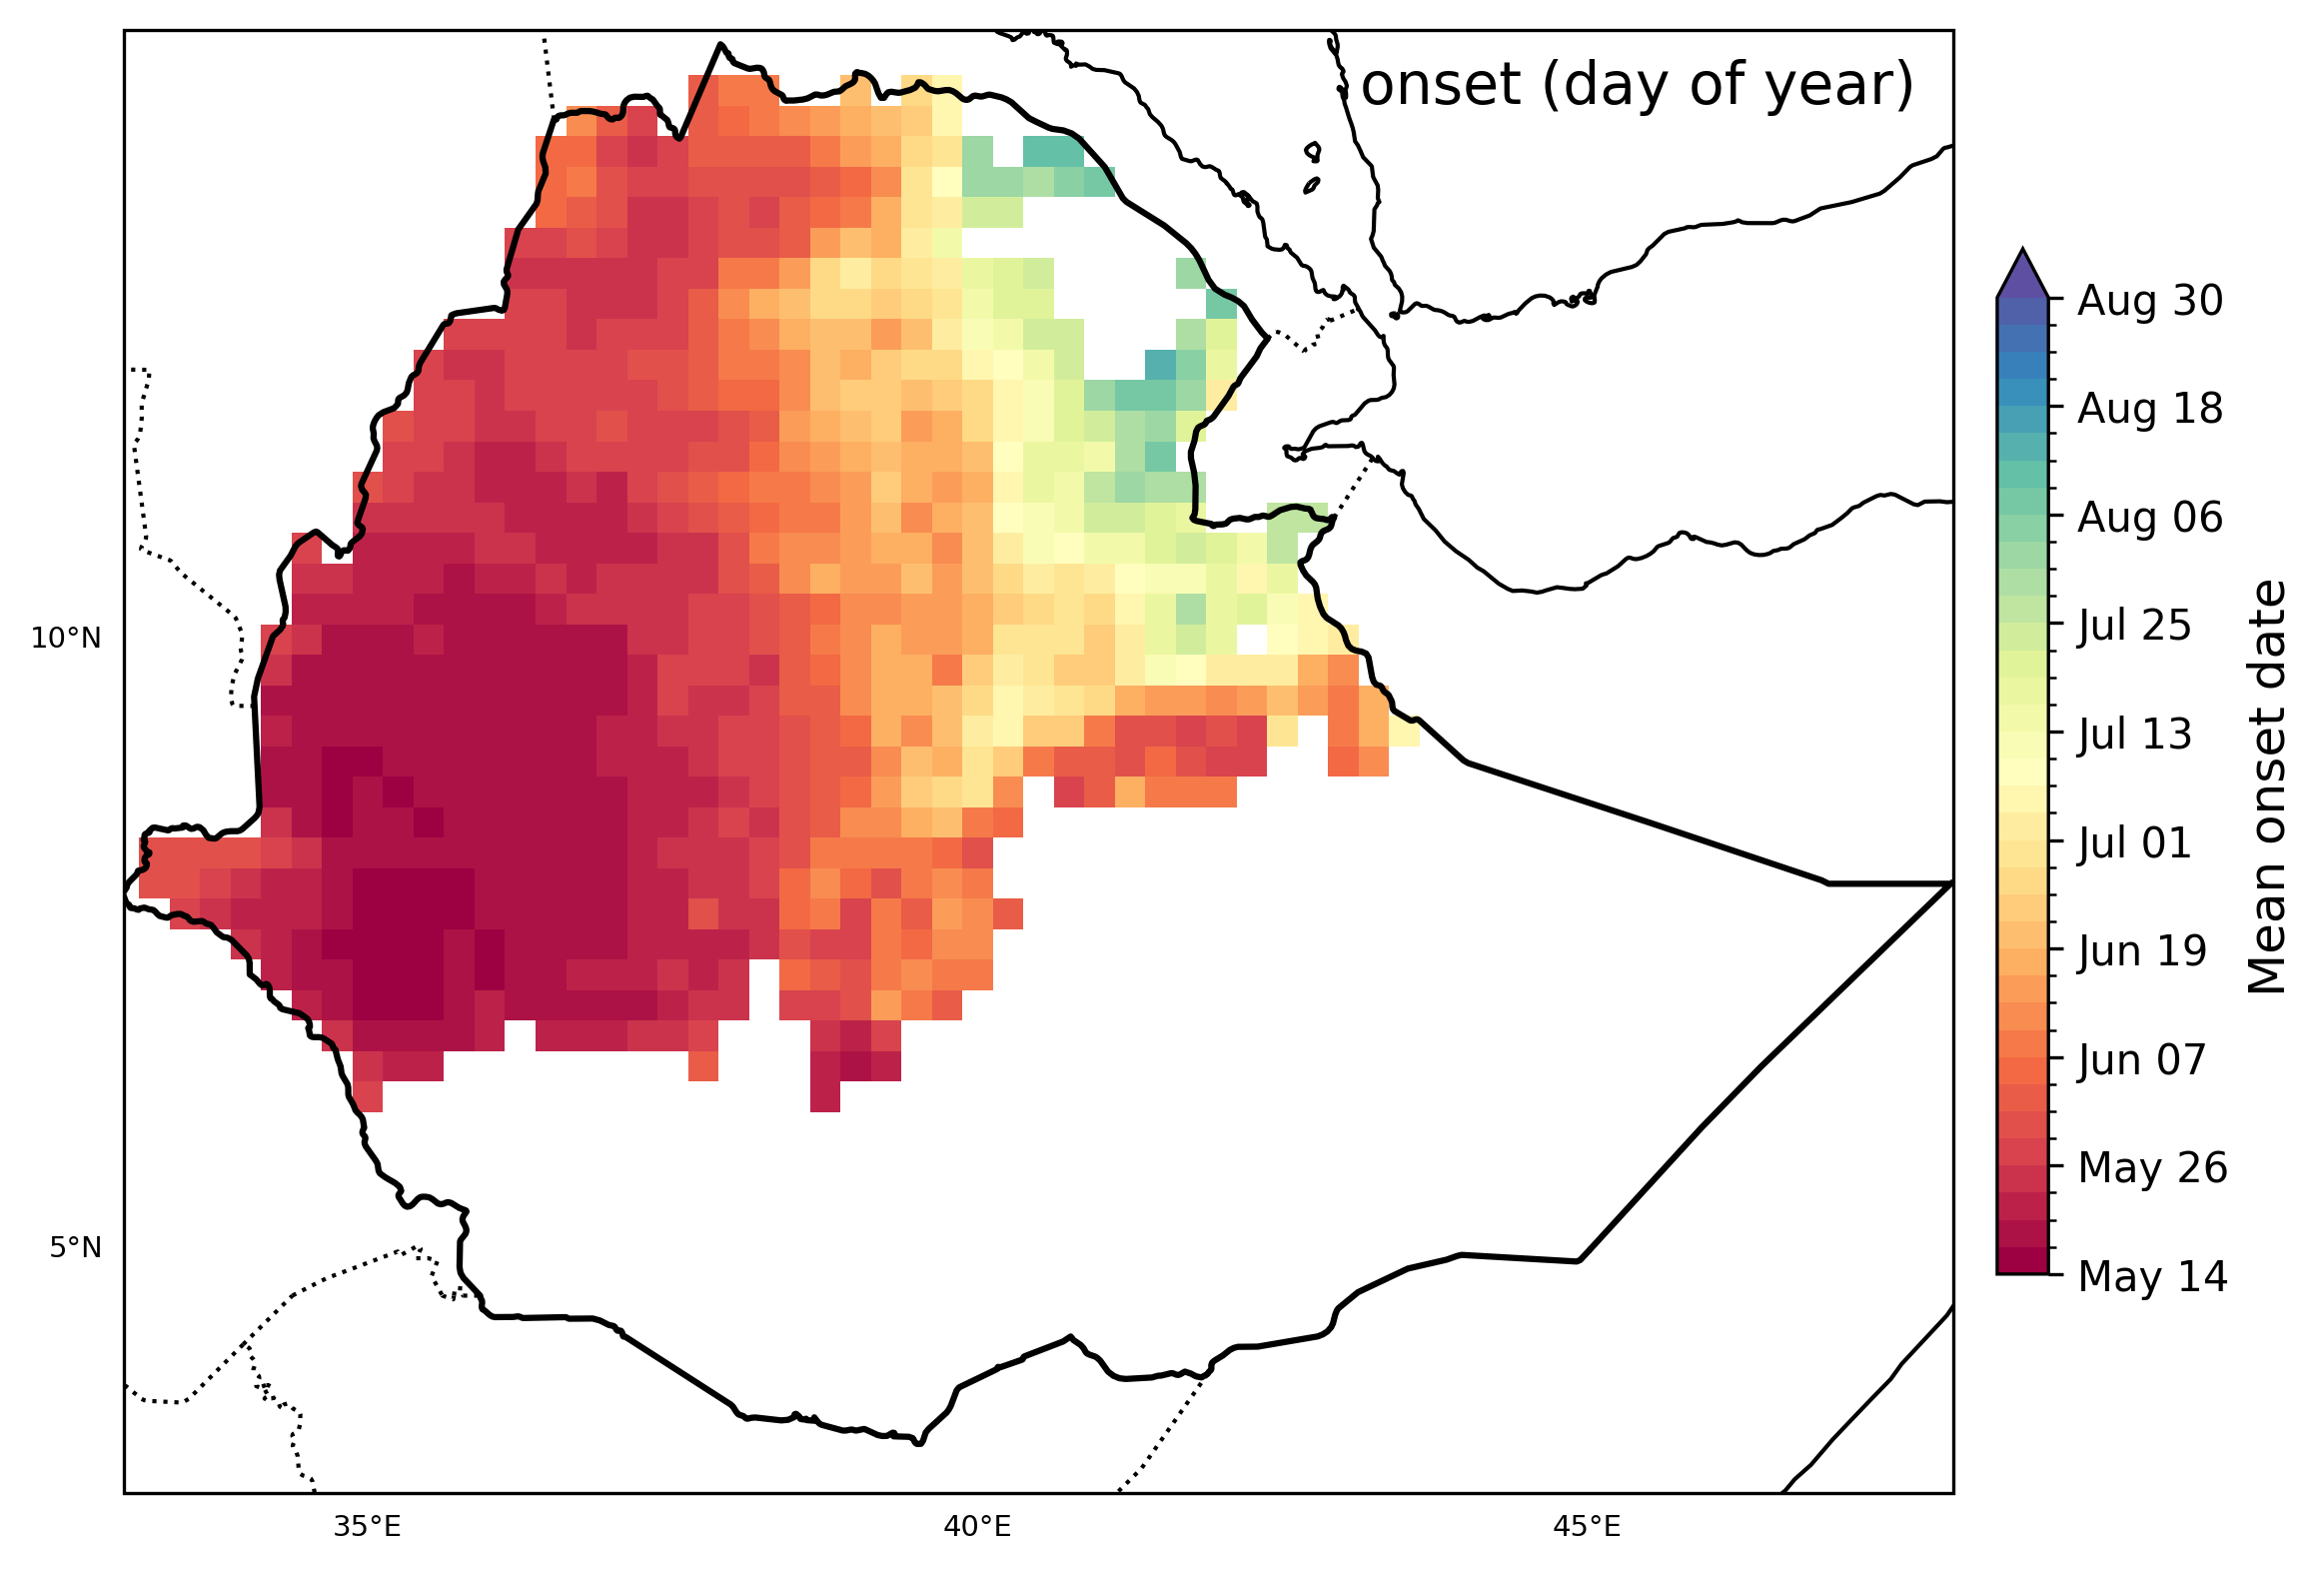

In [56]:
import os

start_year = cfg.start_year_clim
end_year = cfg.end_year_clim
dir_fig = cfg.dir_fig
fig_filename = os.path.join(dir_fig, f'climatology_onset_{str(start_year)}-{str(end_year)}.png')
display(Image(filename=fig_filename, width=590))